In [229]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline
import numpy as np

In [230]:
df = pd.read_csv("Titanic.csv")

In [231]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [232]:
df.shape

(1309, 14)

In [233]:
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [234]:
feature_na = [i for i in data.columns if df[i].isnull().sum() > 0]
feature_na

['age', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']

In [235]:
df['age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

In [236]:
missing_ages = df['age'].isnull().sum()
missing_ages

263

In [237]:
median_age = df['age'].median()
df['age'].fillna(median_age, inplace=True)

In [238]:
missing_ages_after = df['age'].isnull().sum()
missing_ages_after

0

In [239]:
df['cabin'].describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: cabin, dtype: object

In [240]:
missing_cabin = df['cabin'].isnull().sum()
missing_cabin

1014

In [241]:
missing_cabin_after = df['cabin'].fillna('Unknown', inplace=True)

In [242]:
df['cabin'].describe()

count        1309
unique        187
top       Unknown
freq         1014
Name: cabin, dtype: object

In [243]:
missing_cabin_after = df['cabin'].isnull().sum()
missing_cabin_after

0

In [244]:
df['embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: embarked, dtype: object

In [245]:
missing_embarked = df['embarked'].isnull().sum()
missing_embarked

2

In [246]:
mode_embarked = df['embarked'].mode()[0]
df['embarked'].fillna(mode_embarked, inplace=True)

In [247]:
mode_embarked

'S'

In [248]:
mode_embarked = df['embarked'].isnull().sum()
mode_embarked

0

In [249]:
df['fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [250]:
missing_fare = df['fare'].isnull().sum()
missing_fare

1

In [251]:
median_fare = df['fare'].median()
df['fare'].fillna(median_fare, inplace=True)

In [252]:
median_fare

14.4542

In [253]:
missing_fare_after = df['fare'].isnull().sum()
missing_fare_after

0

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1309 non-null   float64
 9   cabin      1309 non-null   object 
 10  embarked   1309 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [291]:
df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,Unknown,C,NaN,22.0,"Montevideo, Uruguay"


In [285]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin           0
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

In [293]:
df['boat'].fillna('Not applicable', inplace=True)


In [299]:
df['body'].fillna(-1, inplace=True)

In [301]:
df.drop('home.dest', axis=1, inplace=True)

In [307]:
df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,-1.0
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,-1.0
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,Not applicable,-1.0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,Not applicable,135.0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,Not applicable,-1.0
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,-1.0
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,-1.0
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,Not applicable,-1.0
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,-1.0
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,Unknown,C,Not applicable,22.0


In [315]:
df.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
cabin       0
embarked    0
boat        0
body        0
dtype: int64

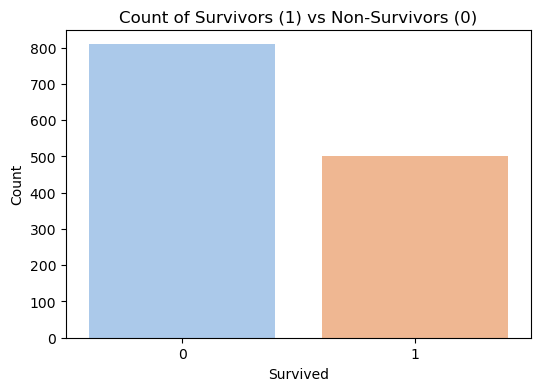

In [337]:
plt.figure(figsize=(6, 4))
sns.countplot(x='survived', data=df, palette='pastel')
plt.title('Count of Survivors (1) vs Non-Survivors (0)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

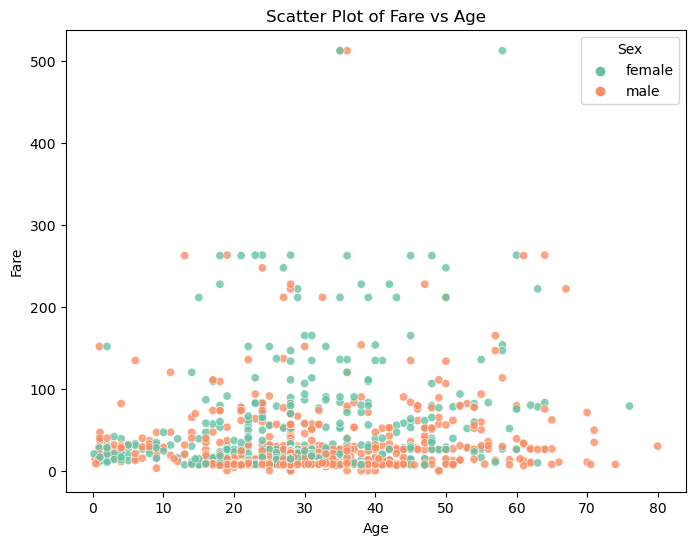

In [339]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='fare', data=df, hue='sex', palette='Set2', alpha=0.8)
plt.title('Scatter Plot of Fare vs Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Sex')
plt.show()

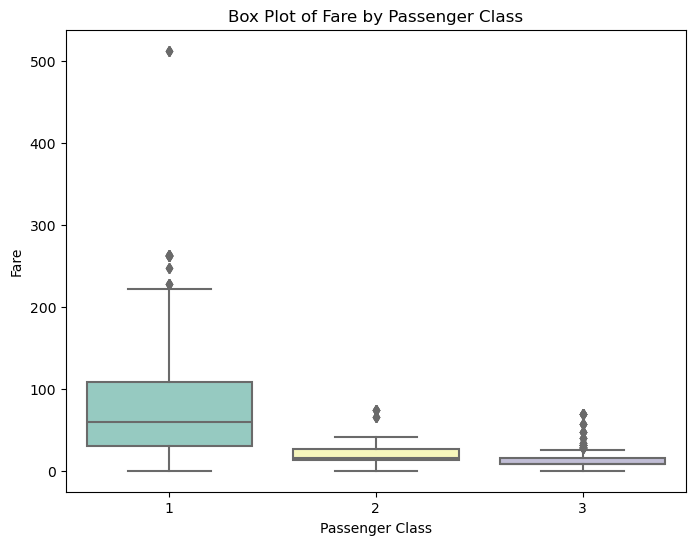

In [341]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='pclass', y='fare', data=df, palette='Set3')
plt.title('Box Plot of Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

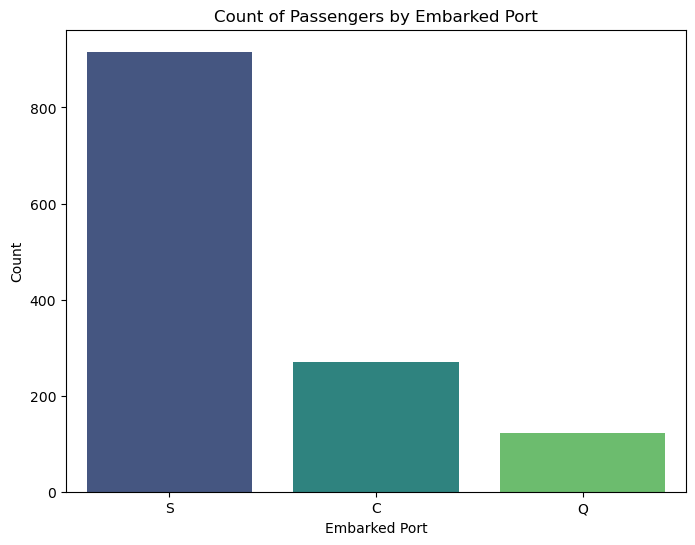

In [343]:
plt.figure(figsize=(8, 6))
sns.countplot(x='embarked', data=df, palette='viridis')
plt.title('Count of Passengers by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.show()

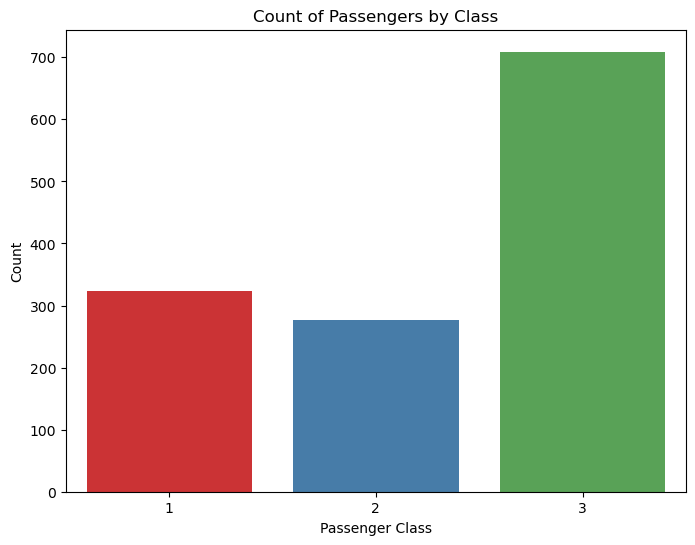

In [345]:
plt.figure(figsize=(8, 6))
sns.countplot(x='pclass', data=df, palette='Set1')
plt.title('Count of Passengers by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

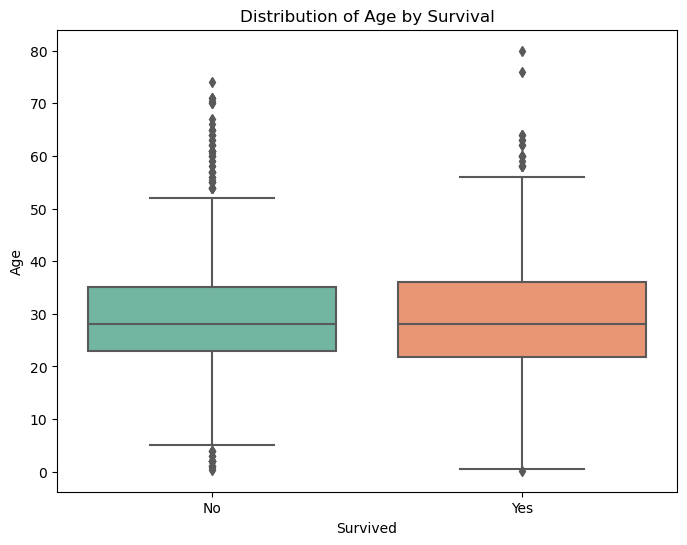

In [347]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='survived', y='age', data=df, palette='Set2')
plt.title('Distribution of Age by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

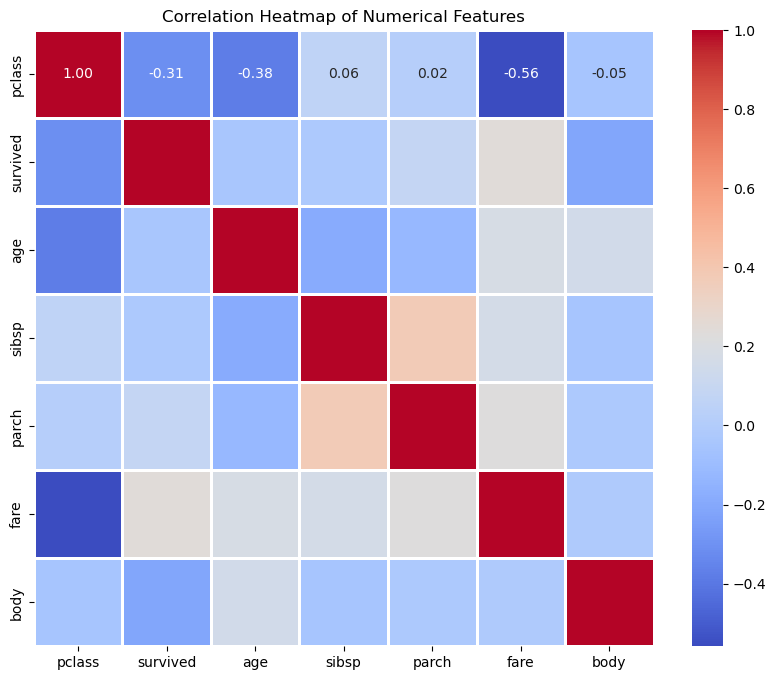

In [354]:
numerical_cols = df.select_dtypes(include=['number']).columns
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

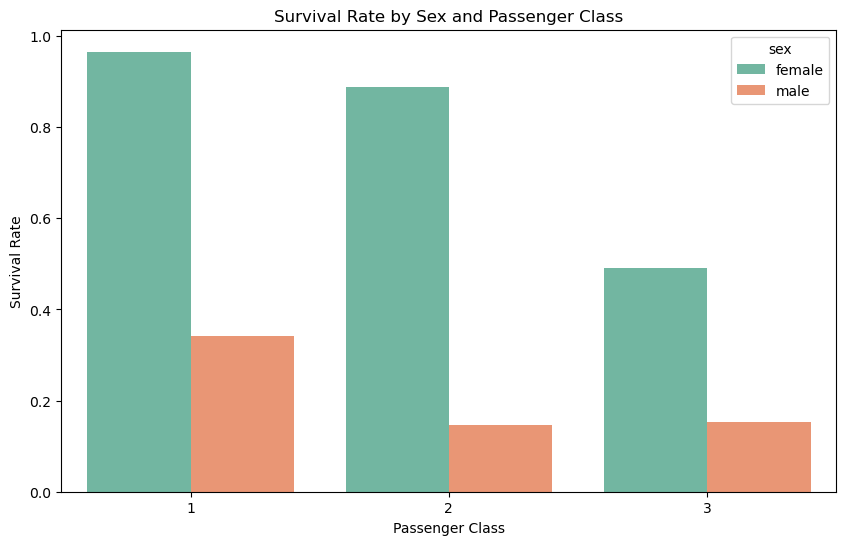

In [356]:
survival_rate = df.groupby(['sex', 'pclass'])['survived'].mean().reset_index()

# Plotting the survival rate
plt.figure(figsize=(10, 6))
sns.barplot(x='pclass', y='survived', hue='sex', data=survival_rate, palette='Set2')
plt.title('Survival Rate by Sex and Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

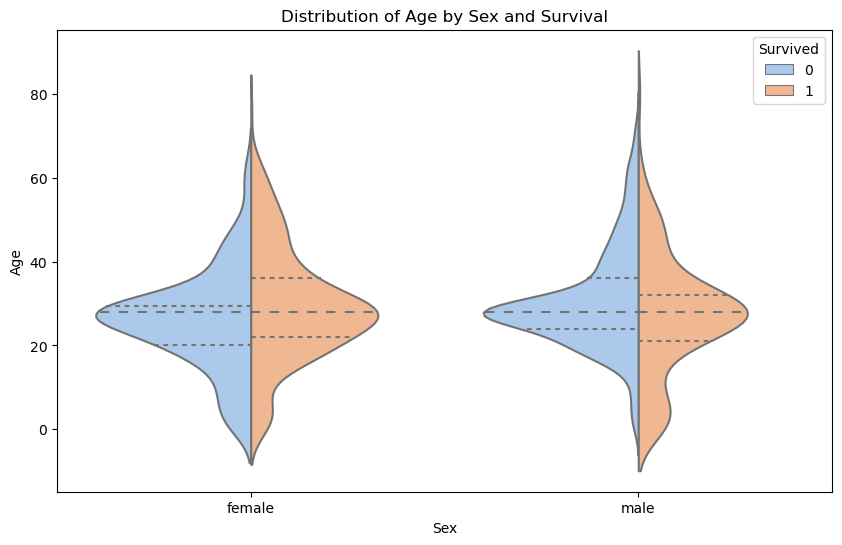

In [359]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='sex', y='age', hue='survived', data=df, split=True, palette='pastel', inner='quartile')
plt.title('Distribution of Age by Sex and Survival')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.legend(title='Survived', loc='upper right')
plt.show()

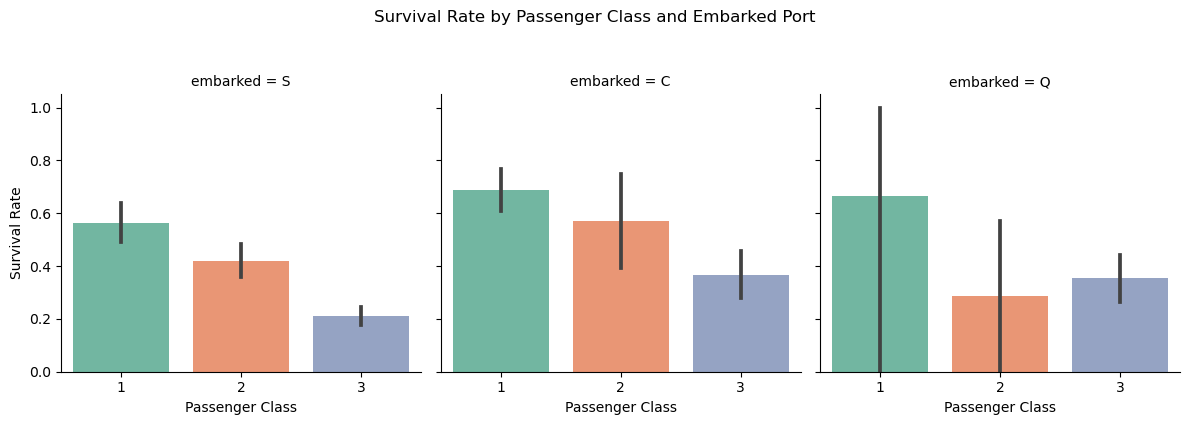

In [361]:
g = sns.FacetGrid(df, col='embarked', height=4, aspect=1, col_wrap=3)
g.map(sns.barplot, 'pclass', 'survived', order=[1, 2, 3], palette='Set2')
g.set_axis_labels('Passenger Class', 'Survival Rate')
g.fig.suptitle('Survival Rate by Passenger Class and Embarked Port', y=1.05)
plt.tight_layout()
plt.show()